# ETS lab Tutorial 4: Orbital objects - I


## Setup


Here we import the libraries needed for this activity

While you should by now be familiar with the **numpy** (array manipulation) and **matplotlib/mpl_toolkits** (ploting), the other imports are less known:

The **ephem** library is used here for dealing with Two/Three Line Elements (TLEs) of orbital objects and computing their positions at different times.
The term "ephem" is short for the word ephemeris, which is the traditional term for a table giving the position of a planet, asteroid, or comet for a series of dates.

From the Astrophysics Source Code Library:  http://ascl.net/1112.014
_PyEphem provides scientific-grade astronomical computations for the Python programming language. Given a date and location on the Earth's surface, it can compute the positions of the Sun and Moon, of the planets and their moons, and of any asteroids, comets, or earth satellites whose orbital elements the user can provide. Additional functions are provided to compute the angular separation between two objects in the sky, to determine the constellation in which an object lies, and to find the times at which an object rises, transits, and sets on a particular day.
The numerical routines that lie behind PyEphem are those from the XEphem astronomy application (ascl:1112.013), whose author, Elwood Downey, generously gave permission for us to use them as the basis for PyEphem._

The **datetime** library is used for manipulating dates and times. We'll use it for setting times for orbit propagation.

Finally, the **csv** library handles CSV (Comma Separated Values) files and is used here for writing an output CSV file with results of orbit computations.

If you get errors check first if you haven't installed some of these libraries. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d         #for 3D plots as the name suggests
import ephem
import datetime
import csv

### A quick overview of datetime 
More in https://docs.python.org/3/library/datetime.html

In [4]:
# A quick overview of datetime 
mydate = datetime.datetime.today()

In [5]:
# Lets inspect this datetime
datetime.datetime.today()

datetime.datetime(2023, 11, 7, 9, 39, 42, 464724)

In [6]:
# You can set the date
datetime.datetime(2020, 11, 8,15)

datetime.datetime(2020, 11, 8, 15, 0)

In [5]:
# The timedelta object provides time intervals. This is handy for adding/subtracting time intervals to dates.
#i.e. for creating arrays of times

## iterador para somar intervalos de tempo predefinidos
datetime.timedelta(minutes=20)

datetime.timedelta(seconds=1200)

In [7]:
print(mydate)
print(mydate + datetime.timedelta(hours=20))

2023-11-07 09:39:39.515738
2023-11-08 05:39:39.515738


### Overview of ephem

In [5]:
# Set observer's coordinates and time
# This example uses Lisbon
obs = ephem.Observer()
obs.lat = np.deg2rad(38.717)
obs.long = np.deg2rad(9.133)
obs.date = datetime.datetime.today()


# another example: Bahia
#obs.lat = np.deg2rad(-11.409874)
#obs.long = np.deg2rad(-41.280857)


In [41]:
# note that the date is stored in the "obs" object in another format
# Can you guess what this number means?
obs.date

#PyEphem dates are encoded
# as the “Dublin Julian Day”, which is the number of days (including any fraction) that have passed since the last day of 1899, at noon

#Hora zero segundo o ephem
#print(ephem.Date(0))

44871.48611111112

In [7]:
# Lets check the "obs" object help
help(obs)

Help on Observer in module ephem object:

class Observer(_libastro.Observer)
 |  A location on earth for which positions are to be computed.
 |  
 |  An `Observer` instance allows you to compute the positions of
 |  celestial bodies as seen from a particular latitude and longitude on
 |  the Earth's surface.  The constructor takes no parameters; instead,
 |  set its attributes once you have created it.  Defaults:
 |  
 |  `date` - the moment the `Observer` is created
 |  `lat` - zero latitude
 |  `lon` - zero longitude
 |  `elevation` - 0 meters above sea level
 |  `horizon` - 0 degrees
 |  `epoch` - J2000
 |  `temp` - 15 degrees Celsius
 |  `pressure` - 1010 mBar
 |  
 |  Method resolution order:
 |      Observer
 |      _libastro.Observer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__ = copy(self)
 |  
 |  __repr__(self)
 |      Return a useful textual representation of this Observer.
 |  
 |  compute_pressure(self)
 |      Set the atmospheric pressure for t

In [10]:
# Load Satellite TLE data.

## 2023
l1 = '0 ISS (ZARYA)'
l2 = '1 25544U 98067A   23311.21221355  .00000152  00000-0  10553-4 0  9997'
l3 = '2 25544  51.6445 340.0975 0000915  46.2715  37.8950 15.50212338423972'

# These are old and will give an error when integrating the orbit. Try it.
#l1 = '0 ISS (ZARYA)'
#l2 = '1 25544U 98067A   22312.30189397  .00013166 <00000-0  23944-3 0  9992'
#l3 = '2 25544  51.6452 342.6640 0006517  49.2908  52.8335 15.49849134367539'

#l1 = 'ISS (ZARYA)'         
#l2 = '1 25544U 98067A   20324.17323782  .00001608  00000-0  37253-4 0  9993'
#l3 = '2 25544  51.6464 301.5752 0001608  65.2533  28.5305 15.49051503256043'

orbitElement = ephem.readtle(l1,l2,l3)


In [11]:
# Our TLE was stored in the "orbitElement" object.
# Lets see the attributes orbitElement has by directly inspecting the object.
attributes=dir(orbitElement)
print(attributes)

['M', '_M', '__class__', '__copy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'ap', 'az', 'catalog_number', 'circumpolar', 'compute', 'copy', 'dec', 'decay', 'drag', 'e', 'eclipsed', 'elevation', 'elong', 'epoch', 'g_dec', 'g_ra', 'ha', 'inc', 'mag', 'n', 'name', 'neverup', 'orbit', 'parallactic_angle', 'ra', 'raan', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'writedb']


In [12]:
# Those are the names of the attributes. Some are obvious but others are not. 
# Since the object is documented, we can also evoke help.
# (or search for the ephem package documentation)

help(orbitElement)

Help on EarthSatellite object:

class EarthSatellite(Body)
 |  A satellite in orbit around the Earth, usually built by passing the text of a TLE entry to the `ephem.readtle()` routine. You can read and write its orbital parameters through the following attributes:
 |  
 |  _ap -- argument of perigee at epoch (degrees)
 |  _decay -- orbit decay rate (revolutions per day-squared)
 |  _drag -- object drag coefficient (per earth radius)
 |  _e -- eccentricity
 |  _epoch -- reference epoch (mjd)
 |  _inc -- inclination (degrees)
 |  _M -- mean anomaly (degrees from perigee at epoch)
 |  _n -- mean motion (revolutions per day)
 |  _orbit -- integer orbit number of epoch
 |  _raan -- right ascension of ascending node (degrees)
 |  
 |  Method resolution order:
 |      EarthSatellite
 |      Body
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ---------------------

In [13]:
# Compute the orbit

## onde é que o objeto orbital está na sua trajetória, em relação ao observador obs
orbitElement.compute(obs)


In [17]:
# Check a result. e.g. altitude
orbitElement.alt

## por ex, para o azimute az
orbitElement.az ## resultado em radiano
print(orbitElement.az) ## resultado em grau, minutos e segundos

278:35:45.7


### Analysis

In [62]:
# Make some datetimes covering a whole day (24h, starting at a time of your choice)
# This will provide the times for plotting 
date = datetime.datetime(2022, 11, 7, 0)
step = datetime.timedelta(minutes=20)
points = []
for _ in range(72):
    points.append(date)
    date = date + step

# Compute satellite locations (altitude and azimuth - alt, az) at each datetime
# Load Satellite TLE data.
l1 = '0 ARIANE 5 DEB'
l2 = '1 43384U 08030G   23310.35462513  .00000321  00000-0  11450-2 0  9990'
l3 = '2 43384   1.9920 320.7057 7193962   5.0213 359.5179  2.29854213124201'

orbitElement = ephem.readtle(l1,l2,l3)
#help(orbitElement)

# Check a results
alt = []
az = []
ele = []
for k in points:
    obs.date = k
    # Compute the orbit
    orbitElement.compute(obs)
    ele.append(orbitElement.elevation)
    az.append(orbitElement.az) ## resultado em radiano
    alt.append(orbitElement.alt)

Text(0.5, 1.0, 'Azimuth')

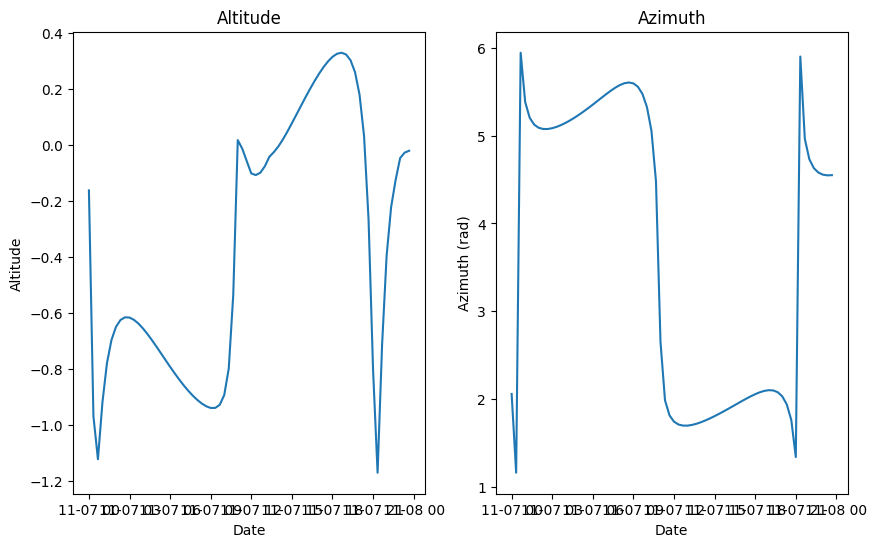

In [63]:
# Plot satellite tracks:
nrow = 1
ncol = 2

fig = plt.figure(figsize=(10,6))
# alt vs time
ax = fig.add_subplot(nrow,ncol,1)
plt.plot(points, alt)
plt.xlabel('Date')
plt.ylabel('Altitude')
plt.title('Altitude')
# az vs time
ax = fig.add_subplot(nrow,ncol,2)
plt.plot(points, az)
plt.xlabel('Date')
plt.ylabel('Azimuth (rad)')
plt.title('Azimuth')



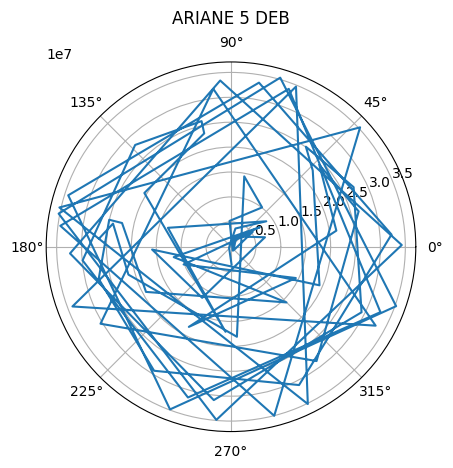

In [64]:
# Plot satellite track (alt and az) in polar coordinates

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.rad2deg(az), ele)
ax.grid(True)
ax.set_title("ARIANE 5 DEB", va='bottom')
plt.show()